# Interactive 2d Visualization

In [1]:
# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1515)
pd.set_option('precision', 2)

## Model interpolation

In [3]:
# %% 
# Data Preparation
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'

geo_data = gp.create_data('viz_2d', [0, 1000, 0, 1000, 0, 1000], resolution=[10, 10, 10],
                          path_o=data_path + "/data/input_data/jan_models/model5_orientations.csv",
                          path_i=data_path + "/data/input_data/jan_models/model5_surface_points.csv")


Active grids: ['regular']


i:\pycharmprojects\gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


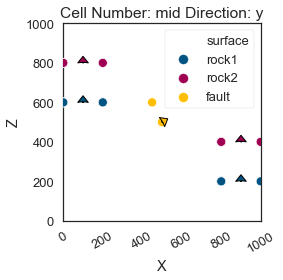

In [4]:
gp.plot_2d(geo_data)

In [5]:
geo_data.set_topography()

[ 800. 1000.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  50.        ,   50.        ,   50.        ],
       [  50.        ,   50.        ,  150.        ],
       [  50.        ,   50.        ,  250.        ],
       ...,
       [1000.        ,  777.77777778,  840.68258309],
       [1000.        ,  888.88888889,  819.11994824],
       [1000.        , 1000.        ,  812.66878829]])

In [6]:
section_dict = {'section1':([0,0],[1000,1000],[100,80]),
                 'section2':([800,0],[800,1000],[150,100]),
                 'section3':([50,200],[100,500],[200,150])} 

In [7]:
geo_data.set_section_grid(section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
section1,"[0, 0]","[1000, 1000]","[100, 80]",1414.21
section2,"[800, 0]","[800, 1000]","[150, 100]",1000.00
section3,"[50, 200]","[100, 500]","[200, 150]",304.14


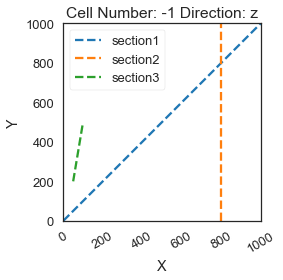

In [8]:
gp.plot.plot_section_traces(geo_data)

In [9]:
gp.set_interpolator(geo_data)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1.7e+03
$C_o$            7.1e+04
drift equations   [3, 3]


In [10]:
gp.map_series_to_surfaces(geo_data, 
                          {"Fault_Series":'fault', 
                           "Strat_Series": ('rock2','rock1')})

geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [11]:
geo_data.get_active_grids()

array(['regular', 'topography', 'sections'], dtype='<U10')

In [12]:
gp.compute_model(geo_data);

i:\pycharmprojects\gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


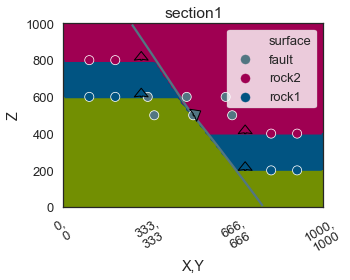

In [13]:
gp.plot_2d(geo_data, section_names=['section1'])

### Plot2d-Pro: Granular interface:

#### One plot

In [14]:
%matplotlib qt5
p = gp.plot_2d(geo_data, section_names=[], direction=None, show=False)

<Figure size 1497.6x1029.6 with 0 Axes>

In [15]:
sec_name = 'section1'
a = p.add_section(sec_name)

In [16]:
p.plot_data(a, sec_name, projection_distance=200)

In [17]:
p.plot_contacts(a, sec_name)

In [18]:
p.plot_lith(a, sec_name)
p.plot_topography(a, sec_name)

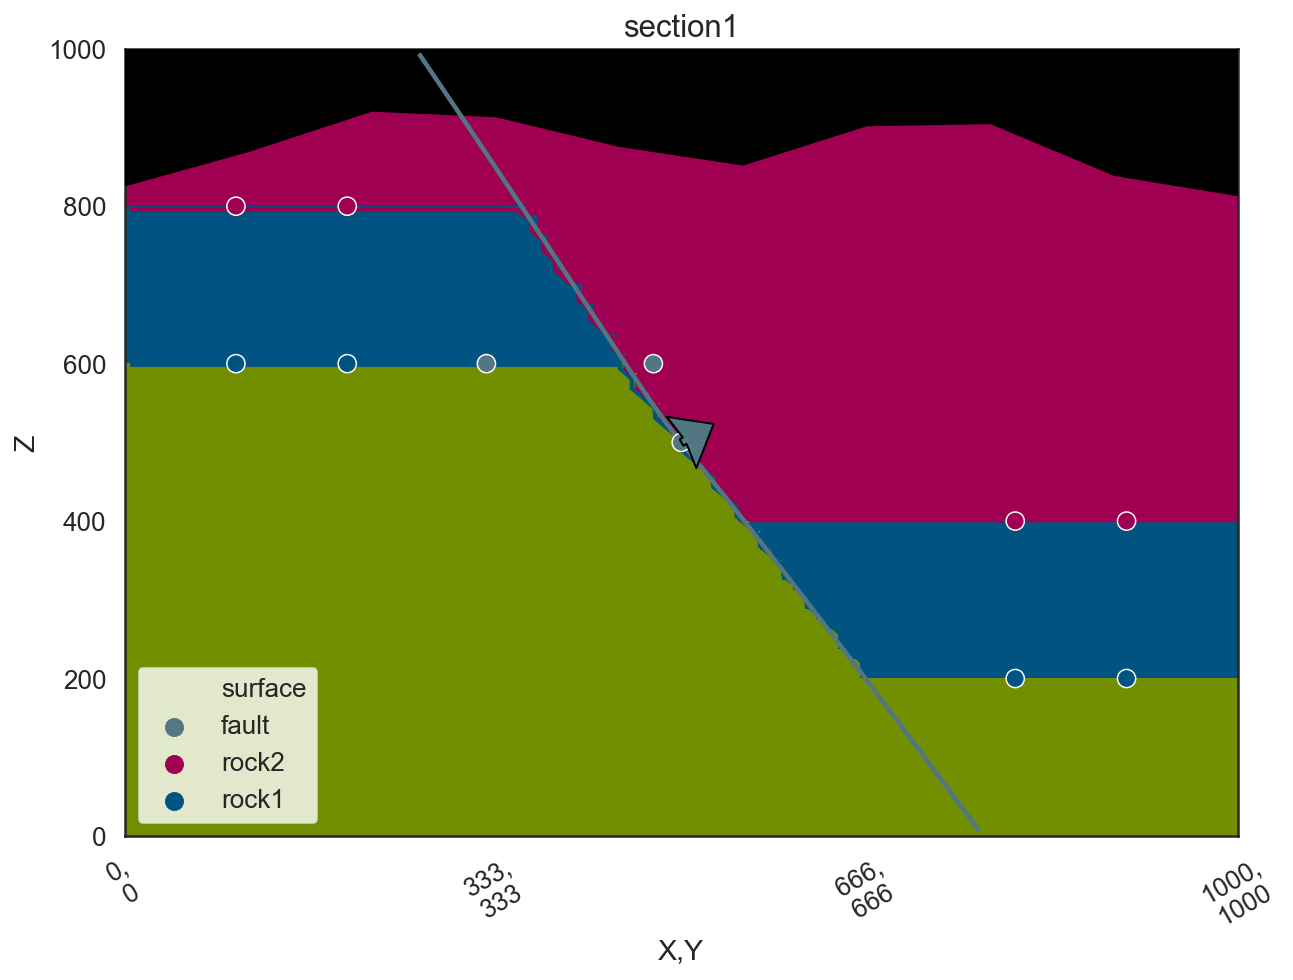

In [19]:
p.fig

#### Several plots

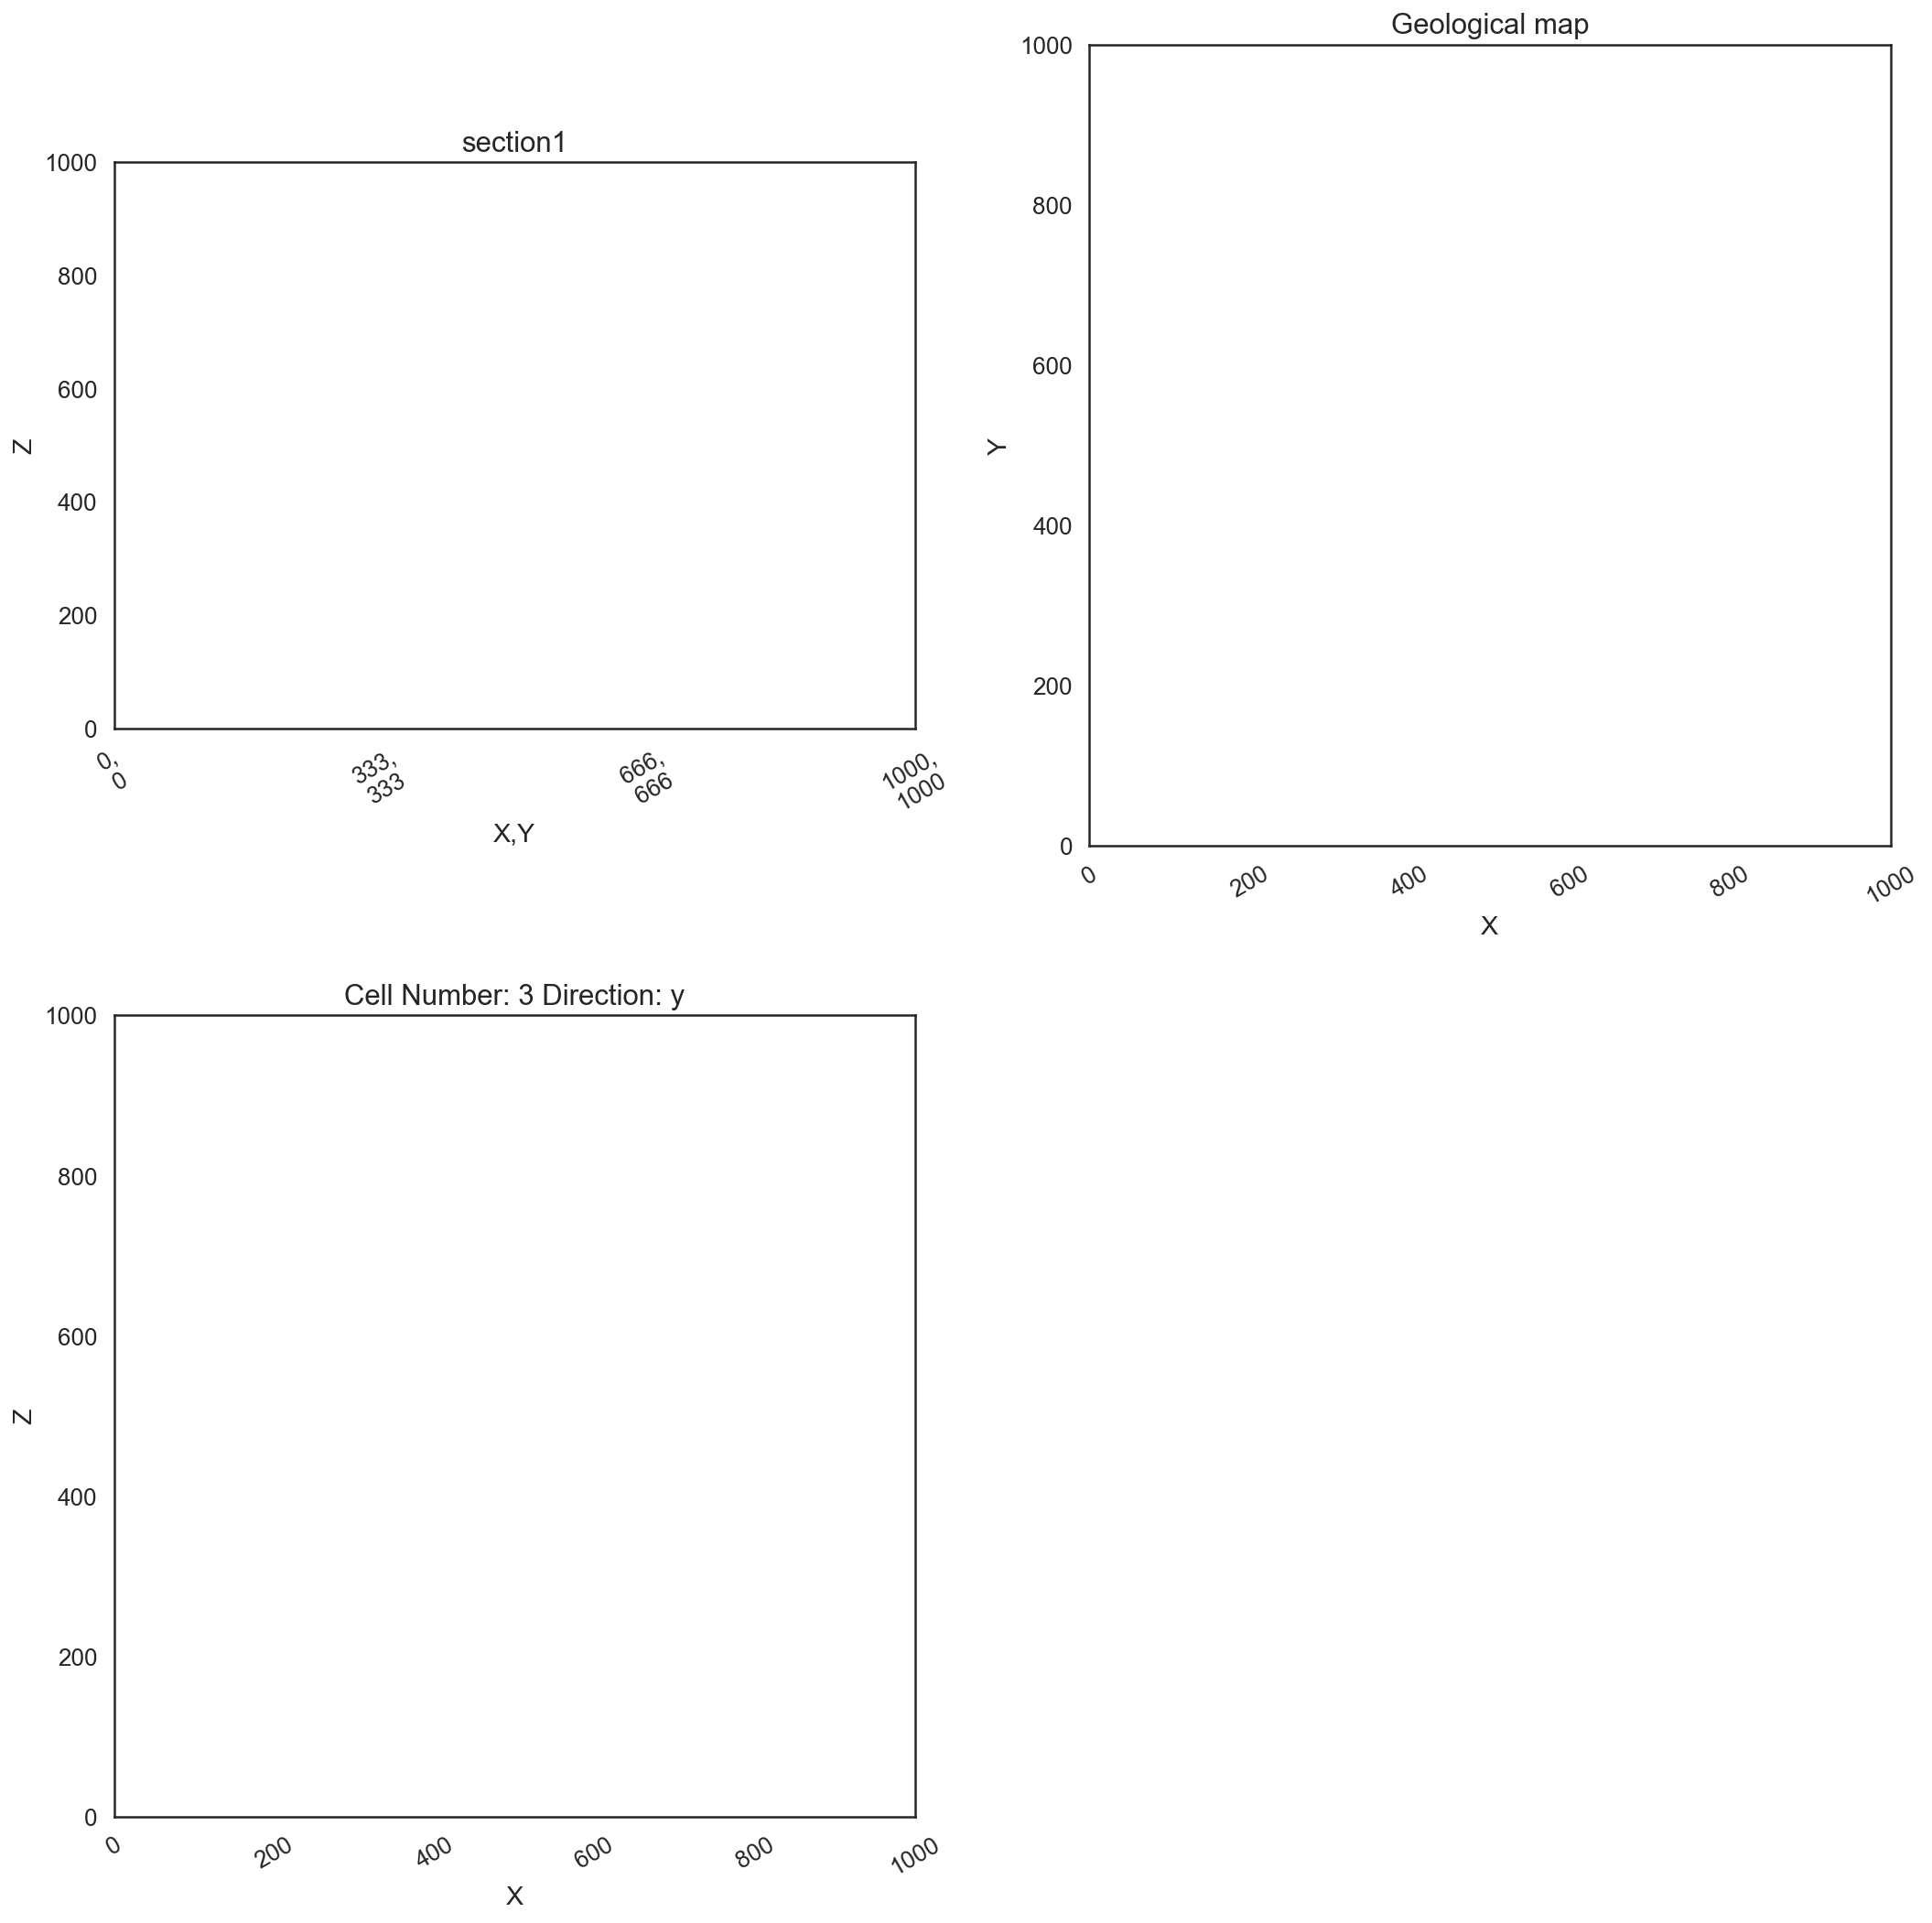

In [20]:
sec_name = 'section1'
sec_name_2 = 'section3'


p2 = gp.plot_2d(geo_data, n_axis = 3, figsize=(15,15), # General fig options
                     section_names=[sec_name,'topography'], cell_number=[3], # Defining the sections
                     show_data=False, show_lith=False, show_scalar=False, show_boundaries=False) 

In [21]:
# Create the section. This loacte the axes and give the right
# aspect ratio and labels

s1 = p2.add_section(sec_name_2, ax_pos=224)

In [22]:
###### Axes 0
p2.plot_contacts(s1, sec_name_2)
p2.plot_lith(s1, sec_name_2)
p2.plot_data(s1, sec_name_2, projection_distance=200)
p2.plot_topography(s1, sec_name_2)

# # Axes 1
p2.plot_contacts(p2.axes[0], cell_number=3)
p2.plot_scalar_field(p2.axes[0], cell_number=3, series_n=1)


# Axes2.
p2.plot_lith(p2.axes[1], 'topography')
p2.plot_contacts(p2.axes[1], 'topography')

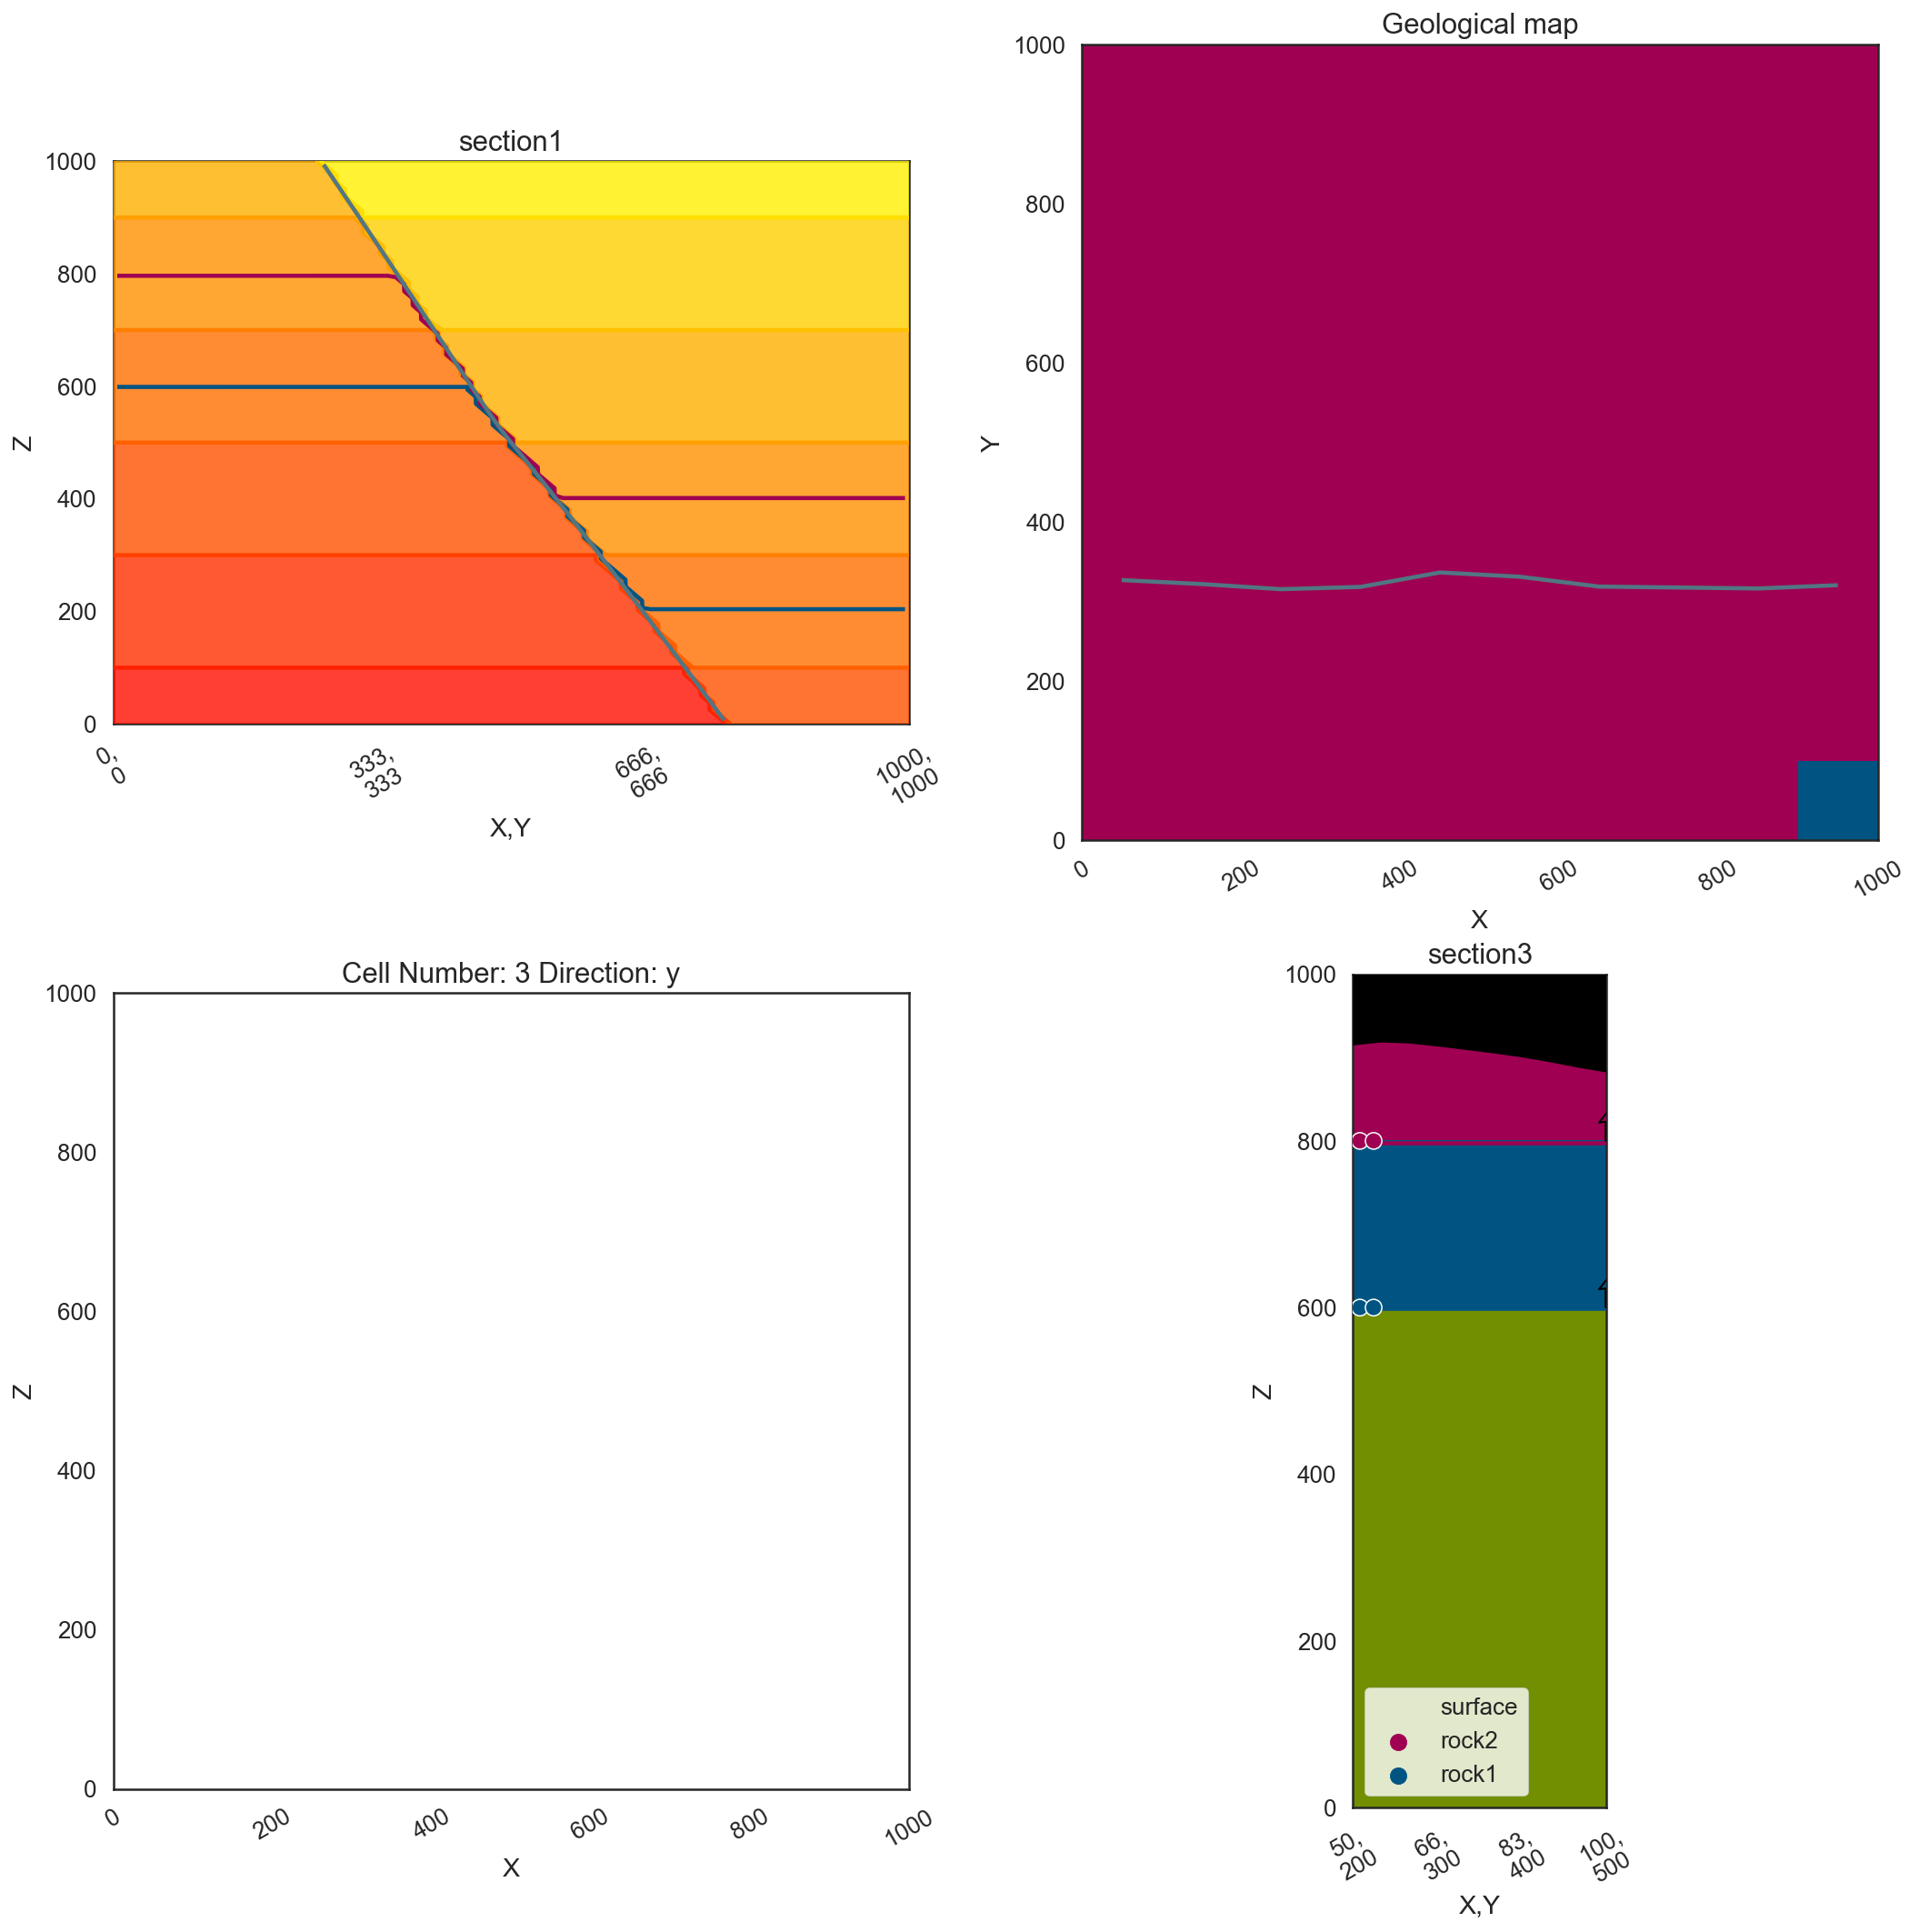

In [23]:
p2.fig

##### Plotting traces:

In [24]:
p2.plot_section_traces(p2.axes[1])

### Plot API

If nothing is passed, a Plot2D object is created and therefore you are in the same situation as above:

In [25]:
# By default we plot a cross-section mainly for backwards compatibility
p3 = gp.plot_2d(geo_data, direction=None)

i:\pycharmprojects\gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


<Figure size 432x288 with 0 Axes>

Alternatively you can pass section_names, cell_numbers + direction or any combination of the above:

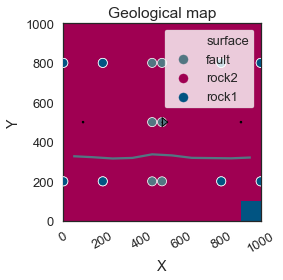

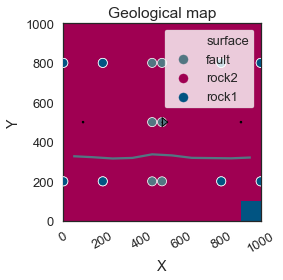

In [26]:
%matplotlib inline
_ = gp.plot_2d(geo_data, section_names=['topography'])

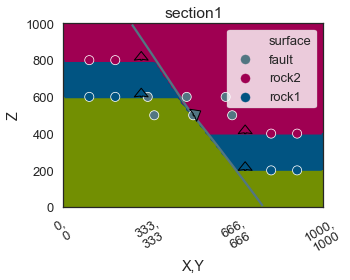

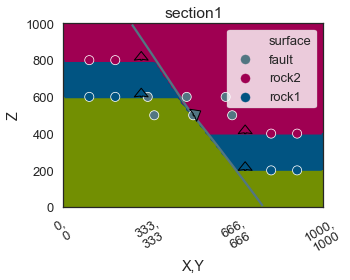

In [27]:
_ = gp.plot_2d(geo_data, section_names=['section1'])

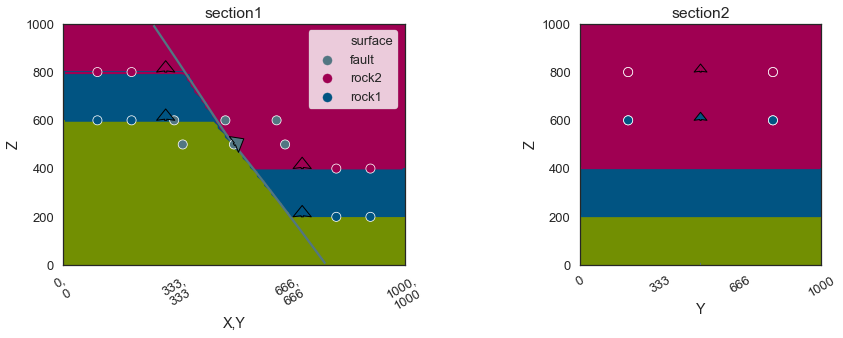

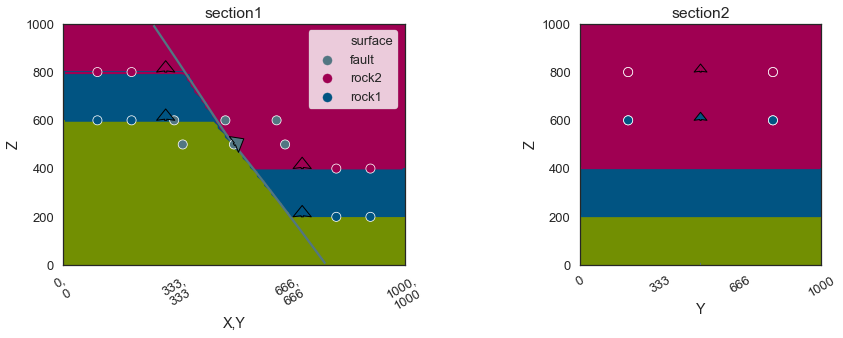

In [28]:
_ = gp.plot_2d(geo_data, section_names=['section1', 'section2'])

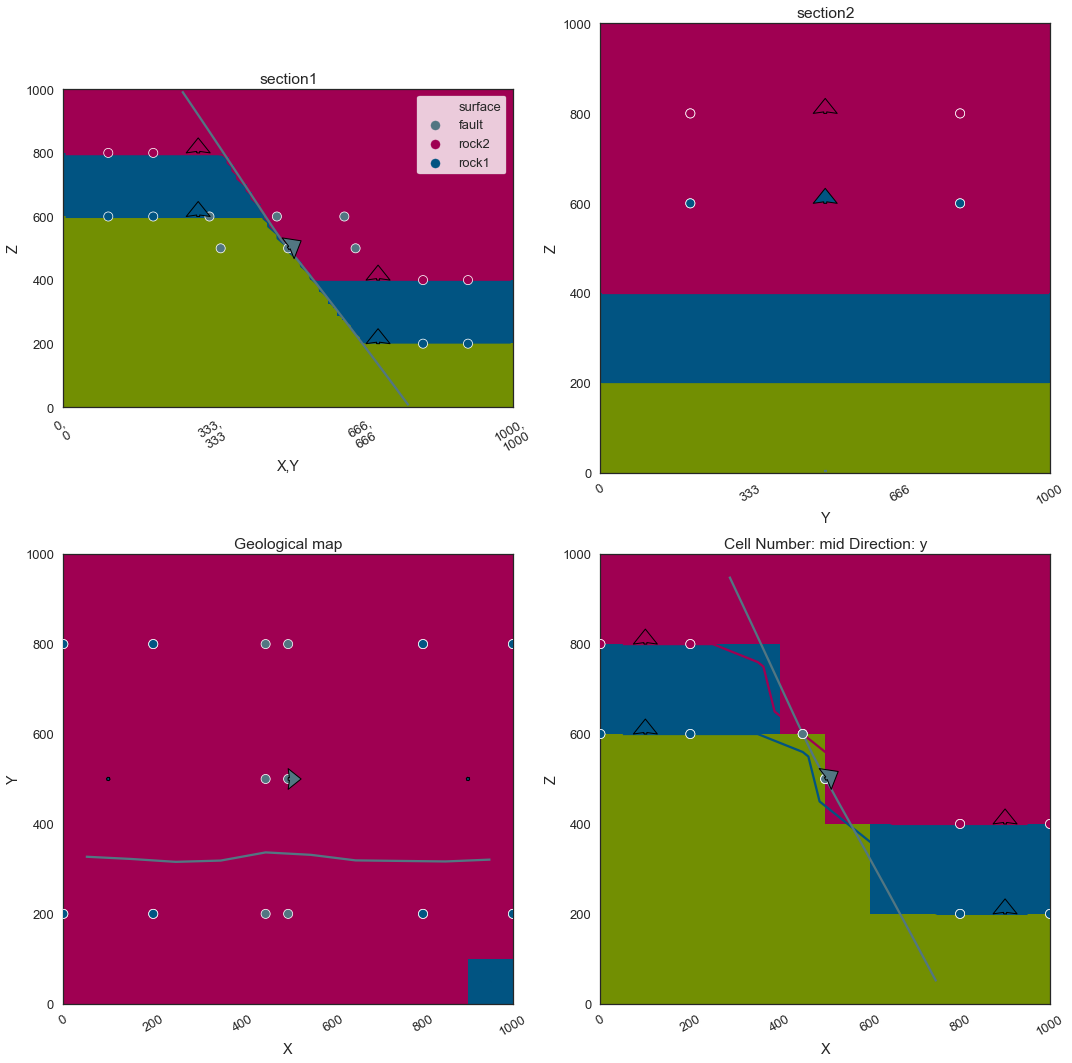

In [31]:
_ = gp.plot_2d(geo_data, figsize=(15,15), section_names=['section1', 'section2', 'topography'],
           cell_number='mid')
